<a href="https://www.kaggle.com/code/abhinavrrao/object-detection-using-yolo?scriptVersionId=196294785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load YOLO model
yolo = cv2.dnn.readNet("/kaggle/input/yolo-obj-detect/yolov3-tiny.weights", "/kaggle/input/yolo-obj-detect/yolov3-tiny.cfg")

# Load class names
classes = []
with open("/kaggle/input/yolo-obj-detect/coco.names", 'r') as f:
    classes = f.read().splitlines()

# Load the image
img = cv2.imread("/kaggle/input/cars-to-test/carsss.webp")
height, width = img.shape[:2]  # Get the height and width of the image


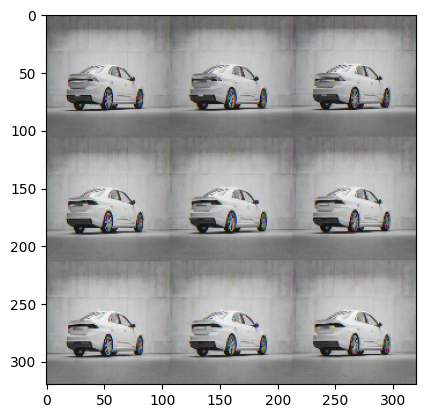

In [3]:
# Preprocess the image
blob = cv2.dnn.blobFromImage(img, 1/255, (320, 320), (0, 0, 0), swapRB=True, crop=False)

# For visualization (optional)
i = blob[0].reshape(320, 320, 3)
plt.imshow(i)
plt.show()

# Set the input for YOLO
yolo.setInput(blob)

# Get output layer names and perform a forward pass
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

# Initialize lists for bounding boxes, confidences, and class IDs
boxs = []
confidences = []
class_ids = []
# Iterate through each detection in each output layer
confidence_threshold = 0.5  # Adjusted confidence threshold for better accuracy
nms_threshold = 0.4  # Adjusted NMS threshold

In [4]:
# Iterate through each detection in each output layer
for output in layeroutput:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence > confidence_threshold:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxs.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)



In [5]:
# Apply Non-Max Suppression (NMS)
indexes = cv2.dnn.NMSBoxes(boxs, confidences, score_threshold=0.5, nms_threshold=0.4)

# Check the number of bounding boxes
len(boxs)


3

In [6]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxs),3))

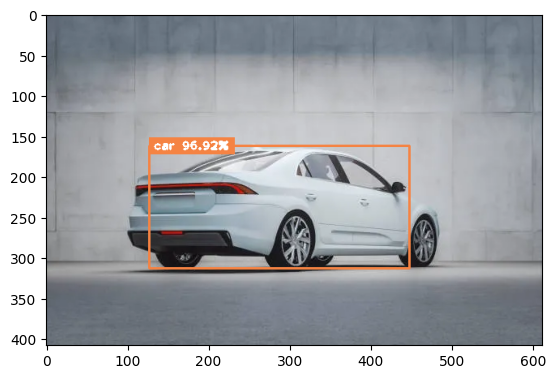

In [7]:
# Draw bounding boxes and labels on the image
for i in indexes.flatten():
    x, y, w, h = boxs[i]
    
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i] * 100, 2)) + "%"  # Display accuracy as a percentage
    color = colors[class_ids[i] % len(colors)]  # Use modulo to avoid IndexError
    
    # Draw the rectangle around the detected object
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    
    # Adjust font size and thickness for better visibility
    font_scale = 1.0
    font_thickness = 2
    text = f"{label} {confi}"
    
    # Get text size to create a background
    (text_width, text_height) = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_offset_x = x
    text_offset_y = y - 10 if y - 10 > 20 else y + 20  # Ensure text is inside image bounds
    
    # Create a rectangle background for the text with padding
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 10, text_offset_y + text_height + 10))
    cv2.rectangle(img, box_coords[0], box_coords[1], color, cv2.FILLED)
    
    # Put the label and confidence score on the image
    cv2.putText(img, text, (text_offset_x + 5, text_offset_y + text_height + 5), font, font_scale, (255, 255, 255), font_thickness)

# Display the resulting image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
